# Find model/scenario sets with complete data
We wish to find the most complete set of variables possible. We will restrict ourselves to the first order (i.e. CO2 but not subtypes) and find the subset of scenarios which have all of them. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import silicone

import silicone.multiple_infillers as mi
import silicone.database_crunchers as cr
from silicone.utils import (
    download_or_load_sr15,
)

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
sr15_file = "./../input/complete_sr15.csv"
all_models = [
    'AIM/CGE 2.0', 'AIM/CGE 2.1', 'C-ROADS-5.005', 'GCAM 4.2', 'GENeSYS-MOD 1.0', 
    'IEA Energy Technology Perspective Model 2017', 'IEA World Energy Model 2017', 
    'IMAGE 3.0.1', 'IMAGE 3.0.2', 'MERGE-ETL 6.0', 'MESSAGE V.3', 'MESSAGE-GLOBIOM 1.0', 
    'MESSAGEix-GLOBIOM 1.0', 'POLES ADVANCE', 'POLES CD-LINKS', 'POLES EMF33', 'REMIND 1.5', 
    'REMIND 1.7', 'REMIND-MAgPIE 1.5', 'REMIND-MAgPIE 1.7-3.0', 
    'Shell World Energy Model 2018', 'WITCH-GLOBIOM 3.1', 'WITCH-GLOBIOM 4.2', 'WITCH-GLOBIOM 4.4'
]

df = download_or_load_sr15(sr15_file, all_models).filter(region="World") 
df.head()

pyam.core - INFO: Reading file `./../input/complete_sr15.csv`


,model,scenario,region,variable,unit,year,value
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2005,8.3367
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2010,7.6408
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2015,7.2724
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2020,7.0752
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Emissions|BC,Mt BC/yr,2025,5.8486


We will start off selecting only model/ scenarios sets that have some PFC data, as this is the most restrictive condition. 

In [3]:
vars = df.filter(level=1).variables()
ms = ["model", "scenario"]
accepted_mscen = df.filter(variable="*PFC").data[["model", "scenario"]].drop_duplicates()
for var in vars:
    accepted_mscen = accepted_mscen.merge(
        df.filter(variable=var).timeseries(), 
        on=ms, 
        how='left', 
        indicator=True,
    )
    accepted_mscen = accepted_mscen.loc[accepted_mscen._merge=="both"][ms]

In [4]:
accepted = df.data.merge(accepted_mscen, on=ms, how="left", indicator=True)
accepted = accepted[accepted._merge=="both"]

In [5]:
del accepted["_merge"]
accepted = pyam.IamDataFrame(accepted)
print(accepted.head())

         model                           scenario region      variable  \
0  AIM/CGE 2.1  TERL_15D_LowCarbonTransportPolicy  World  Emissions|BC   
1  AIM/CGE 2.1  TERL_15D_LowCarbonTransportPolicy  World  Emissions|BC   
2  AIM/CGE 2.1  TERL_15D_LowCarbonTransportPolicy  World  Emissions|BC   
3  AIM/CGE 2.1  TERL_15D_LowCarbonTransportPolicy  World  Emissions|BC   
4  AIM/CGE 2.1  TERL_15D_LowCarbonTransportPolicy  World  Emissions|BC   

       unit  year   value  
0  Mt BC/yr  2005  9.1717  
1  Mt BC/yr  2010  9.8494  
2  Mt BC/yr  2015  9.9234  
3  Mt BC/yr  2020  9.7993  
4  Mt BC/yr  2025  9.1199  


pyam.plotting - INFO: >=13 labels, not applying legend


47


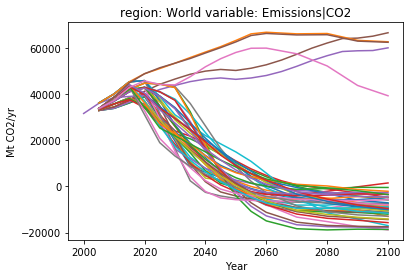

In [6]:
accepted.filter(variable="*CO2").line_plot()
print(len(accepted.filter(variable="*CO2").timeseries()))

If we want all model/scenario pairs that have the individual HFC and PFCs, we get a more restricted group:

In [7]:
var_len={}
all_hfc_pfc_vars = df.filter(variable=["*HFC|*", "*PFC|*"]).variables()
for var in all_hfc_pfc_vars:
    var_len[var] = len(df.filter(variable=var).timeseries())
    accepted_mscen = accepted_mscen.merge(
        df.filter(variable=var).timeseries(), 
        on=ms, 
        how='left', 
        indicator=True,
    )
    accepted_mscen = accepted_mscen.loc[accepted_mscen._merge=="both"][ms]

In [8]:
var_len

{'Emissions|HFC|HFC125': 188,
 'Emissions|HFC|HFC134a': 188,
 'Emissions|HFC|HFC143a': 188,
 'Emissions|HFC|HFC227ea': 188,
 'Emissions|HFC|HFC23': 180,
 'Emissions|HFC|HFC32': 180,
 'Emissions|HFC|HFC43-10': 180,
 'Emissions|HFC|HFC245fa': 38,
 'Emissions|PFC|C2F6': 9,
 'Emissions|PFC|C6F14': 9,
 'Emissions|PFC|CF4': 9}

In [9]:
accepted_hpcf = df.data.merge(accepted_mscen, on=ms, how="left", indicator=True)
accepted_hpcf = accepted_hpcf[accepted_hpcf._merge=="both"]

In [10]:
del accepted_hpcf["_merge"]
accepted_hpcf = pyam.IamDataFrame(accepted_hpcf)
print(accepted_hpcf.head(15))

          model     scenario region      variable      unit  year      value
0   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2005  10.338860
1   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2010  10.678410
2   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2015  10.535940
3   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2020   9.668129
4   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2025   7.875383
5   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2030   6.502812
6   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2035   5.899133
7   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2040   5.516333
8   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2045   5.197948
9   IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2050   4.799323
10  IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2060   4.433563
11  IMAGE 3.0.1  IMA15-AGInt  World  Emissions|BC  Mt BC/yr  2070   3.541492

In [11]:
accepted_hpcf.scenarios()

0      IMA15-AGInt
1        IMA15-Def
2        IMA15-Eff
3     IMA15-LiStCh
4     IMA15-LoNCO2
5        IMA15-Pop
6    IMA15-RenElec
7        IMA15-TOT
Name: scenario, dtype: object

In [12]:
hpfc_scen = df.filter(variable=all_hfc_pfc_vars).scenarios()
hpfc_scen

0                      ADVANCE_2020_1.5C-2100
1                          ADVANCE_2020_Med2C
2                           ADVANCE_2020_WB2C
3                      ADVANCE_2030_1.5C-2100
4                          ADVANCE_2030_Med2C
                        ...                  
123                TERL_15D_NoTransportPolicy
124          TERL_2D_LowCarbonTransportPolicy
125                 TERL_2D_NoTransportPolicy
126    TERL_Baseline_LowCarbonTransportPolicy
127           TERL_Baseline_NoTransportPolicy
Name: scenario, Length: 128, dtype: object

8


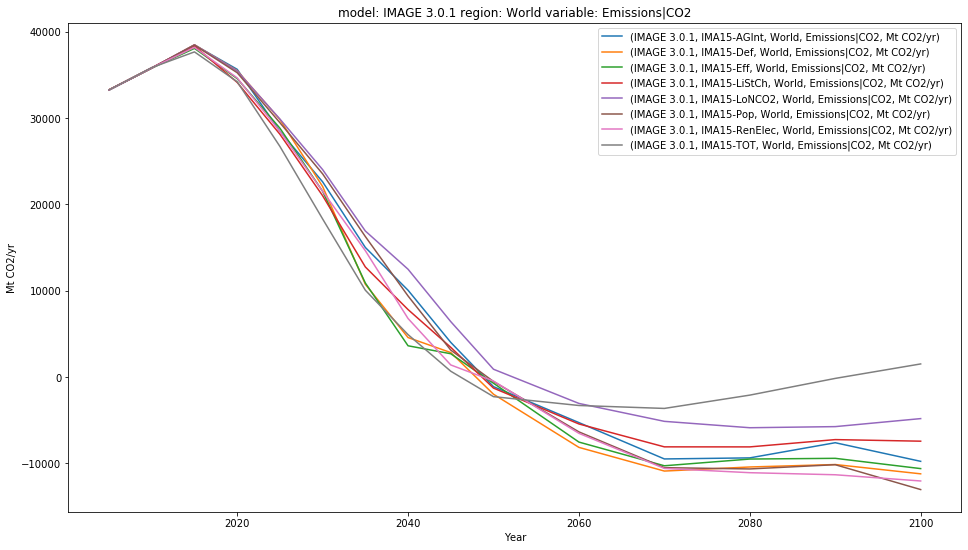

In [13]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
accepted_hpcf.filter(variable="*CO2").line_plot(ax=ax)
print(len(accepted_hpcf.filter(variable="*CO2").timeseries()))

0    Faster Transition Scenario
1                   IMA15-AGInt
2                     IMA15-Def
3                     IMA15-Eff
4                  IMA15-LiStCh
5                  IMA15-LoNCO2
6                     IMA15-Pop
7                 IMA15-RenElec
8                     IMA15-TOT
Name: scenario, dtype: object

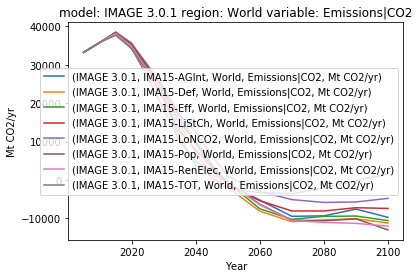

In [14]:
# df.filter(variable="*CO2", model="IMAGE 3.0.1").line_plot()
df.filter(model="IMAGE 3.0.1", scenario="IMA15*", variable="*CO2").line_plot()
df.filter(variable="*PFC|*").scenarios()

## Save the results to files

In [15]:
accepted.to_csv("../output/allvar_sr15_mscen.csv")
accepted.filter(variable="*CO2*").to_csv("../output/allvar_co2_only_sr15_mscen.csv")
accepted.filter(variable=["*CO2*", "*CH4*"]).to_csv("../output/allvar_co2ch4_only_sr15_mscen.csv")
accepted_hpcf.to_csv("../output/all_var_inc_hpfcs.csv")